In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [13]:
#!pip install statsmodels

In [15]:
df = pd.read_csv ("./real_estate_price_size.csv") 

In [16]:
df.shape

(100, 2)

In [18]:
df.head()
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [21]:
y = df['price']
x = df['size']

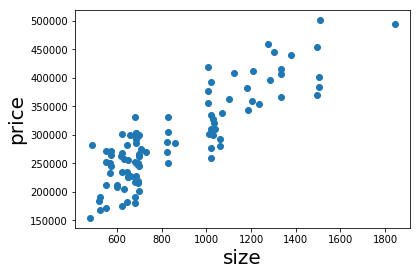

In [24]:
plt.scatter(x, y)
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

<h2>linear Regression</h2>

In [26]:
x_= sm.add_constant(x)
result = sm.OLS(y,x_).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 04 May 2023   Prob (F-statistic):           8.13e-31
Time:                        19:18:27   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

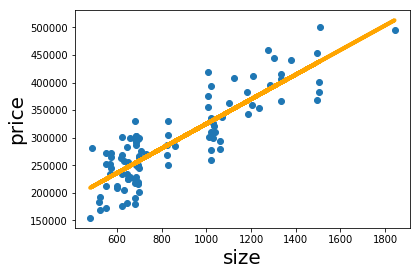

In [36]:
plt.scatter(x, y)
yhat = x*223.1787+101900
fig = plt.plot(x, yhat, lw = 4, c ='orange', label="regressu=ion line")
plt.xlabel ('size', fontsize = 20)
plt.ylabel ('price', fontsize = 20)
plt.show()

<h2>Dealing with categorical data</h2>

In [40]:
df1 = pd.read_csv("./Dummies.csv")

In [41]:
df1.shape

(84, 3)

In [42]:
df1.head ()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


<h3> Mapping data </h3>

In [43]:
df1['Attendance'] = df1['Attendance'].map ({"Yes" : 1, "No" : 0})

In [45]:
df1.describe ()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


<h3>Regression</h3>

In [49]:
y = df1['GPA']
x =df1[['SAT', 'Attendance']]

In [50]:
x_ = sm.add_constant (x)
results = sm.OLS (y, x_).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.19e-15
Time:                        20:38:52   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

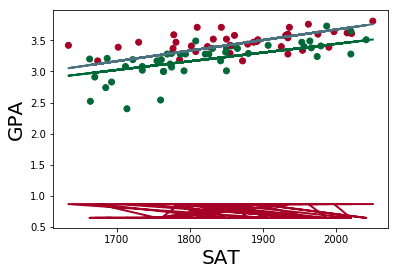

In [52]:
plt.scatter (df1['SAT'], df1['GPA'], c = df1['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * df1['SAT']
yhat_yes = 0.6439 + 0.2226 * df1['Attendance']

yhat = 0.0017*df1['SAT'] + 0.275

fig = plt.plot (df1['SAT'], yhat_no, lw=2, c= "#006837", label = 'regression line 1')
fig = plt.plot (df1['SAT'], yhat_yes, lw=2, c= "#a50026", label = 'regression line 2')
fig = plt.plot (df1['SAT'], yhat, lw=2, c= "#4C7280", label = 'regression line')

plt.xlabel ('SAT', fontsize = 20)
plt.ylabel ('GPA', fontsize = 20)

plt.show()